#Wordle Game - Data Understanding

In [118]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
#Necessary libraries for the development of data understanding.
import re
import copy
import nltk
import random
import inspect
import squarify
import statistics
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize.toktok import ToktokTokenizer
from scipy.stats import normaltest, chisquare, kstest, spearmanr,shapiro, pearsonr,ks_2samp 
from scipy.stats import wilcoxon
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [120]:
stopword_list=nltk.corpus.stopwords.words('spanish')

In [121]:
%cd "/content/drive/MyDrive/raw_texts/"

/content/drive/.shortcut-targets-by-id/1HREl7UKkBMezDiBPlp8Bugej2jyaVfZk/raw_texts


In [122]:
#List with the names of the files where the information will be extracted.
txts = ['Aeropuerto.txt', 'Agricultura.txt', 'Alan_Turing.txt', 'Antiguo_Egipto.txt', 'Arte.txt', 'Asia.txt', 'Babilonia_(ciudad).txt', 'Biblia.txt',
 'Biodiversidad.txt', '%C3%81frica.txt', 'Capitalismo.txt', 'Ciencia.txt', 'Colombia.txt', 'Consumo.txt', 'Cristianismo.txt', 'Cristo.txt', 'Cultura.txt',
 'Democracia.txt', 'Diccionario.txt', 'Divina_comedia.txt', 'Ecologismo.txt', 'Energ%C3%ADa_nuclear.txt', 'Enrique_VIII_de_Inglaterra.txt', 'Escritura.txt',
 'Estados_Unidos.txt', 'Estado.txt', 'Est%C3%A9tica.txt', 'Europa.txt', 'Filosof%C3%ADa.txt', 'Finanzas.txt', 'Fruta.txt', 'Gabriel_Garc%C3%ADa_M%C3%A1rquez.txt',
 'Gastronom%C3%ADa_de_M%C3%A9xico.txt', 'George_Patton.txt', 'Grecia.txt', 'Guerra_Fr%C3%ADa.txt', 'Henry_Ford.txt', 'Holocausto.txt', 'Homo_sapiens.txt',
 'Inteligencia_artificial.txt', 'Italia.txt', 'Jorge_Isaacs.txt', 'Juda%C3%ADsmo.txt', 'Juglar.txt', 'Julio_Garavito.txt', 'Liberalismo.txt', 'Libro.txt',
 'Ludwig_van_Beethoven.txt', 'Nevado_del_Ruiz.txt', 'Nikola_Tesla.txt', 'Odisea.txt', 'Organizaci%C3%B3n_de_las_Naciones_Unidas.txt', 'Per%C3%ADodo_helen%C3%ADstico.txt',
 'Pizza.txt', 'Pueblos_germ%C3%A1nicos.txt', 'Real_Academia_Espa%C3%B1ola.txt', 'Reino_Unido.txt', 'Revoluci%C3%B3n_Industrial.txt', 'Rueda.txt',
 'Salsa_(g%C3%A9nero_musical).txt', 'Saxof%C3%B3n.txt', 'Segunda_Guerra_Mundial.txt', 'Sublime.txt', 'Thomas_Alva_Edison.txt',
 'Valle.txt']

##Extraction and cleaning of data source content.

In [123]:
#Function to remove accents from a string.
def normalize(s):
  #Dictionary with accented and unaccented vowels.
  replacements = (
      ("á", "a"),
      ("é", "e"),
      ("í", "i"),
      ("ó", "o"),
      ("ú", "u"),
  )
  #Replacing vowels with accents with their unaccented form.
  for a, b in replacements:
      s = s.replace(a, b).replace(a.upper(), b.upper())
      
  return s

In [124]:
def words_extraction(text):

  #Removing words containing more than two capital letters.
  text = re.sub(r"[A-ZÑ]\w*[A-ZÑ]\w*",' ', text)

  #Updating uppercase letters to lowercase.
  text = text.lower()

  #Removing accents from words.
  text = normalize(text)

  #Eliminating words that do not belong to the Spanish alphabet.
  text = re.sub(r'[^a-zA-ZÑñ]+',' ',text)

  #Removing punctuation marks.
  text = re.sub(r'[^\w+\s]',' ',text)

  #Removing the underscore.
  text = re.sub(r'[\_]',' ',text)

  #Removing \t, \n, \u200b charactesr in the text.
  text = re.sub(r'\t|\n|\u200b',' ', text)

  #Eliminating words that are stopwords or have a length of less than three.
  word_list = []
  for word in text.split():
    if not word in stopword_list and len(word) > 3:
      word_list.append(word)
  text = " ".join(word_list)
  
  return text.split()

In [125]:
#Variable where all words are stored.
processed_text = []

content_text = []

#The list containing the file names is iterated.
for txt in txts:

  #The txt file opens.
  with open(txt) as file:

    text = ""
    #The txt file is scrolled line by line.
    for line in file:
      text += line
      processed_text.append(words_extraction(line)[:])
    
    content_text.append(text)

processed_text = [item for words in processed_text for item in words]

##know the sources of data

* <h2>How many data sources exist, what is their type and origin?</h2>  
There are several data sources provided by the client, which were extracted using a WebScraping process.     
The data source type is plain text and originates from Wikipedia.

* <h2>What information does each data source contain and how do they relate to each other?</h2>
All data sources contain plain text, with different content, and the source has only one relationship and that is its origin (Wikipedia).

* <h2>How to know the quality of the information contained in each source?</h2>
The quality of the information will be known by checking if the data are complete (cover all required cases), if they are correct, how frequent are the errors, if there are missing values (how they are represented, where and how often they occur).


##Data sampling

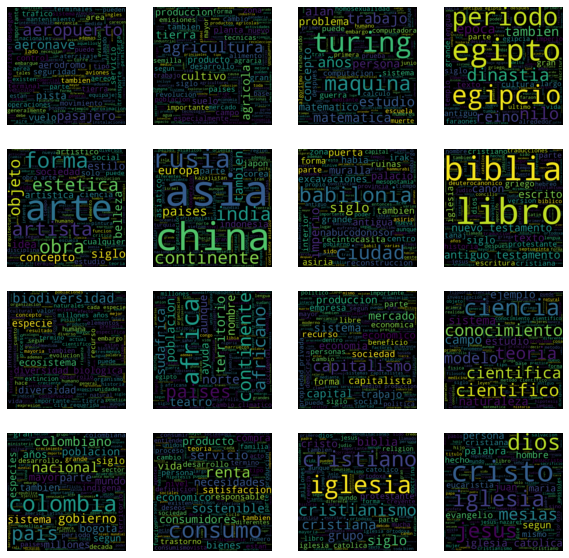

In [126]:
plt.figure(figsize=(10,10))

#Word Cloud of each text. 
for i in range(16):
  
  plt.subplot(4,4,i+1)
  wordcloud = WordCloud(width=700, height=700, margin=0).generate(" ".join(words_extraction(content_text[i])))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.margins(x=0, y=0)

plt.show()                                                                                                      

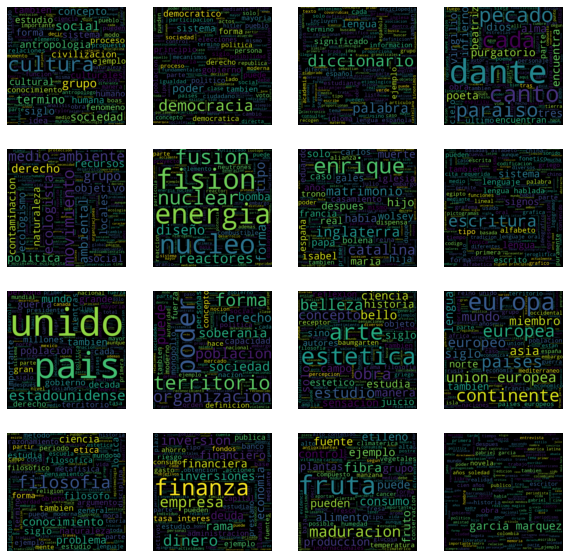

In [127]:
plt.figure(figsize=(10,10))

for i in range(16,32):
  plt.subplot(4,4,(i%16)+1)
  wordcloud = WordCloud(width=700, height=700, margin=0).generate(" ".join(words_extraction(content_text[i])))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.margins(x=0, y=0)

plt.show()  

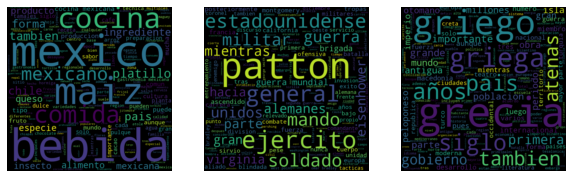

In [128]:
plt.figure(figsize=(10,10))

for i in range(32,35):
  plt.subplot(1,3,(i%32)+1)
  wordcloud = WordCloud(width=700, height=700, margin=0).generate(" ".join(words_extraction(content_text[i])))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.margins(x=0, y=0)

plt.show() 

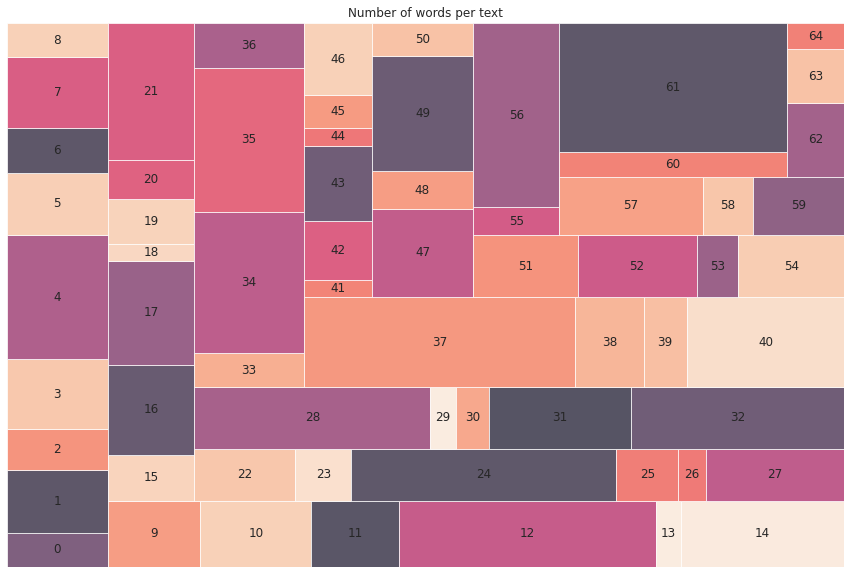

In [129]:
number_of_words_per_text = []

for content in content_text:
  number_of_words_per_text.append(len(words_extraction(content)))

plt.figure(figsize=(15,10))
squarify.plot(sizes=number_of_words_per_text,label=range(len(txts)), alpha=.7 )
plt.axis('off')
plt.title("Number of words per text")
plt.show()

<table class="ws-table-all notranslate">
<tr>
<th style="width:140px">ID</th>
<th>File</th>
<th>Number of words</th>
</tr>
<tr>
<tr>
<th>0</th>
<th>Aeropuerto.txt</th>
<th>1627</th>
</tr>
<tr>
<th>1</th>
<th>Agricultura.txt</th>
<th>3008</th>
</tr>
<tr>
<th>2</th>
<th>Alan_Turing.txt</th>
<th>1939</th>
</tr>
<tr>
<th>3</th>
<th>Antiguo_Egipto.txt</th>
<th>3357</th>
</tr>
<tr>
<th>4</th>
<th>Arte.txt</th>
<th>5901</th>
</tr>
<tr>
<th>5</th>
<th>Asia.txt</th>
<th>2979</th>
</tr>
<tr>
<th>6</th>
<th>Babilonia_(ciudad).txt</th>
<th>2157</th>
</tr>
<tr>
<th>7</th>
<th>Biblia.txt</th>
<th>3367</th>
</tr>
<tr>
<th>8</th>
<th>Biodiversidad.txt</th>
<th>1622</th>
</tr>
<tr>
<th>9</th>
<th>%C3%81frica.txt</th>
<th>2941</th>
</tr>
<tr>
<th>10</th>
<th>Capitalismo.txt</th>
<th>3510</th>
</tr>
<tr>
<th>11</th>
<th>Ciencia.txt</th>
<th>2771</th>
</tr>
<tr>
<th>12</th>
<th>Colombia.txt</th>
<th>8091</th>
</tr>
<tr>
<th>13</th>
<th>Consumo.txt</th>
<th>787</th>
</tr>
<tr>
<th>14</th>
<th>Cristianismo.txt</th>
<th>5163</th>
</tr>
<tr>
<th>15</th>
<th>Cristo.txt</th>
<th>1885</th>
</tr>
<tr>
<th>16</th>
<th>Cultura.txt</th>
<th>3757</th>
</tr>
<tr>
<th>17</th>
<th>Democracia.txt</th>
<th>4344</th>
</tr>
<tr>
<th>18</th>
<th>Diccionario.txt</th>
<th>714</th>
</tr>
<tr>
<th>19</th>
<th>Divina_comedia.txt</th>
<th>1873</th>
</tr>
<tr>
<th>20</th>
<th>Ecologismo.txt</th>
<th>1591</th>
</tr>
<tr>
<th>21</th>
<th>Energ%C3%ADa_nuclear.txt</th>
<th>5733</th>
</tr>
<tr>
<th>22</th>
<th>Enrique_VIII_de_Inglaterra.txt</th>
<th>2503</th>
</tr>
<tr>
<th>23</th>
<th>Escritura.txt</th>
<th>1400</th>
</tr>
<tr>
<th>24</th>
<th>Estados_Unidos.txt</th>
<th>6659</th>
</tr>
<tr>
<th>25</th>
<th>Estado.txt</th>
<th>1631</th>
</tr>
<tr>
<th>26</th>
<th>Est%C3%A9tica.txt</th>
<th>694</th>
</tr>
<tr>
<th>27</th>
<th>Europa.txt</th>
<th>3454</th>
</tr>
<tr>
<th>28</th>
<th>Filosof%C3%ADa.txt</th>
<th>6921</th>
</tr>
<tr>
<th>29</th>
<th>Finanzas.txt</th>
<th>754</th>
</tr>
<tr>
<th>30</th>
<th>Fruta.txt</th>
<th>956</th>
</tr>
<tr>
<th>31</th>
<th>Gabriel_Garc%C3%ADa_M%C3%A1rquez.txt</th>
<th>4151</th>
</tr>
<tr>
<th>32</th>
<th>Gastronom%C3%ADa_de_M%C3%A9xico.txt</th>
<th>6242</th>
</tr>
<tr>
<th>33</th>
<th>George_Patton.txt</th>
<th>1798</th>
</tr>
<tr>
<th>34</th>
<th>Grecia.txt</th>
<th>7395</th>
</tr>
<tr>
<th>35</th>
<th>Guerra_Fr%C3%ADa.txt</th>
<th>7603</th>
</tr>
<tr>
<th>36</th>
<th>Henry_Ford.txt</th>
<th>2353</th>
</tr>
<tr>
<th>37</th>
<th>Holocausto.txt</th>
<th>11645</th>
</tr>
<tr>
<th>38</th>
<th>Homo_sapiens.txt</th>
<th>2927</th>
</tr>
<tr>
<th>39</th>
<th>Inteligencia_artificial.txt</th>
<th>1853</th>
</tr>
<tr>
<th>40</th>
<th>Italia.txt</th>
<th>6772</th>
</tr>
<tr>
<th>41</th>
<th>Jorge_Isaacs.txt</th>
<th>560</th>
</tr>
<tr>
<th>42</th>
<th>Juda%C3%ADsmo.txt</th>
<th>1925</th>
</tr>
<tr>
<th>43</th>
<th>Juglar.txt</th>
<th>2423</th>
</tr>
<tr>
<th>44</th>
<th>Julio_Garavito.txt</th>
<th>603</th>
</tr>
<tr>
<th>45</th>
<th>Liberalismo.txt</th>
<th>1085</th>
</tr>
<tr>
<th>46</th>
<th>Libro.txt</th>
<th>2331</th>
</tr>
<tr>
<th>47</th>
<th>Ludwig_van_Beethoven.txt</th>
<th>4252</th>
</tr>
<tr>
<th>48</th>
<th>Nevado_del_Ruiz.txt</th>
<th>1816</th>
</tr>
<tr>
<th>49</th>
<th>Nikola_Tesla.txt</th>
<th>5561</th>
</tr>
<tr>
<th>50</th>
<th>Odisea.txt</th>
<th>1574</th>
</tr>
<tr>
<th>51</th>
<th>Organizaci%C3%B3n_de_las_Naciones_Unidas.txt</th>
<th>3113</th>
</tr>
<tr>
<th>52</th>
<th>Per%C3%ADodo_helen%C3%ADstico.txt</th>
<th>3537</th>
</tr>
<tr>
<th>53</th>
<th>Pizza.txt</th>
<th>1235</th>
</tr>
<tr>
<th>54</th>
<th>Pueblos_germ%C3%A1nicos.txt</th>
<th>3133</th>
</tr>
<tr>
<th>55</th>
<th>Real_Academia_Espa%C3%B1ola.txt</th>
<th>1128</th>
</tr>
<tr>
<th>56</th>
<th>Reino_Unido.txt</th>
<th>7580</th>
</tr>
<tr>
<th>57</th>
<th>Revoluci%C3%B3n_Industrial.txt</th>
<th>4011</th>
</tr>
<tr>
<th>58</th>
<th>Rueda.txt</th>
<th>1383</th>
</tr>
<tr>
<th>59</th>
<th>Salsa_(g%C3%A9nero_musical).txt</th>
<th>2542</th>
</tr>
<tr>
<th>60</th>
<th>Saxof%C3%B3n.txt</th>
<th>2690</th>
</tr>
<tr>
<th>61</th>
<th>Segunda_Guerra_Mundial.txt</th>
<th>13972</th>
</tr>
<tr>
<th>62</th>
<th>Sublime.txt</th>
<th>2020</th>
</tr>
<tr>
<th>63</th>
<th>Thomas_Alva_Edison.txt</th>
<th>1482</th>
</tr>
<tr>
<th>64</th>
<th>Valle.txt</th>
<th>709</th>
</tr>

##Initial data collection

In [130]:
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'ñ', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [131]:
def position_distribution(letter, processed_text):
  letter_position = []

  for word in processed_text:
    count = 1
    for letter_word in word:
      if letter == letter_word:
        letter_position.append(count)
      count += 1

  return letter_position

In [132]:
print("The number of words extracted from the data source was %d words" %len(list(set(processed_text))))

The number of words extracted from the data source was 32430 words


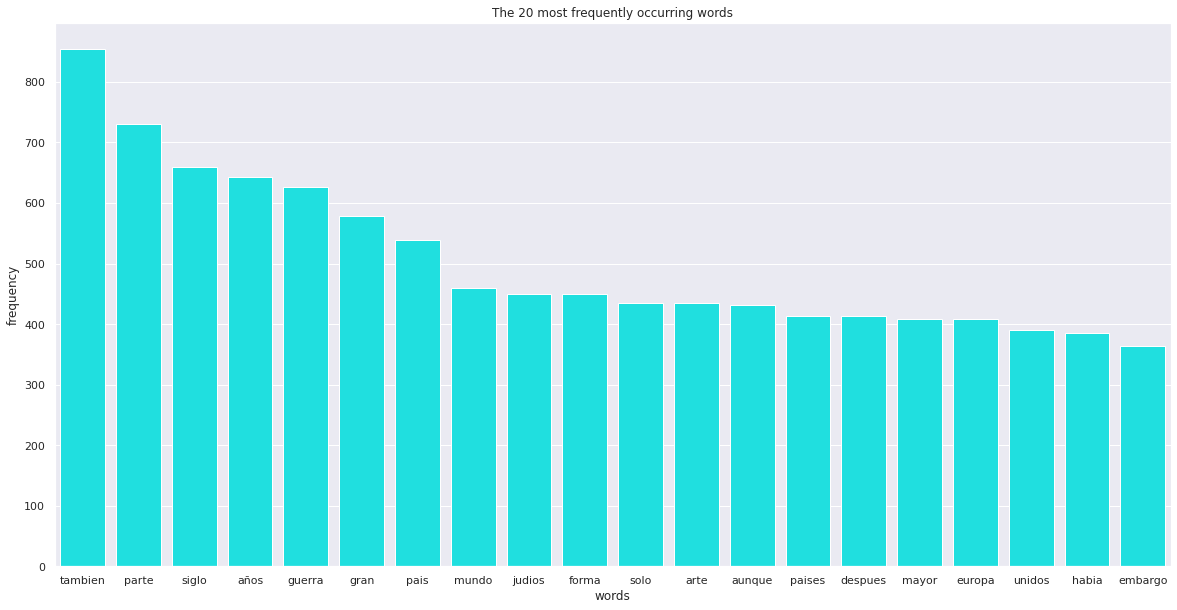

In [133]:
counter = collections.Counter(processed_text)

the_20_most_frequently_occurring_words = pd.DataFrame()
the_20_most_frequently_occurring_words[["words","frequency"]] = pd.DataFrame(counter.most_common()[:20])

sns.set(rc={'figure.figsize':(20,10)})
plt.title("The 20 most frequently occurring words")
sns.barplot(x="words",y="frequency",data=the_20_most_frequently_occurring_words, color="cyan")
plt.show()

In [134]:
extracted_words =  copy.deepcopy(processed_text)
processed_text = list(set(processed_text))

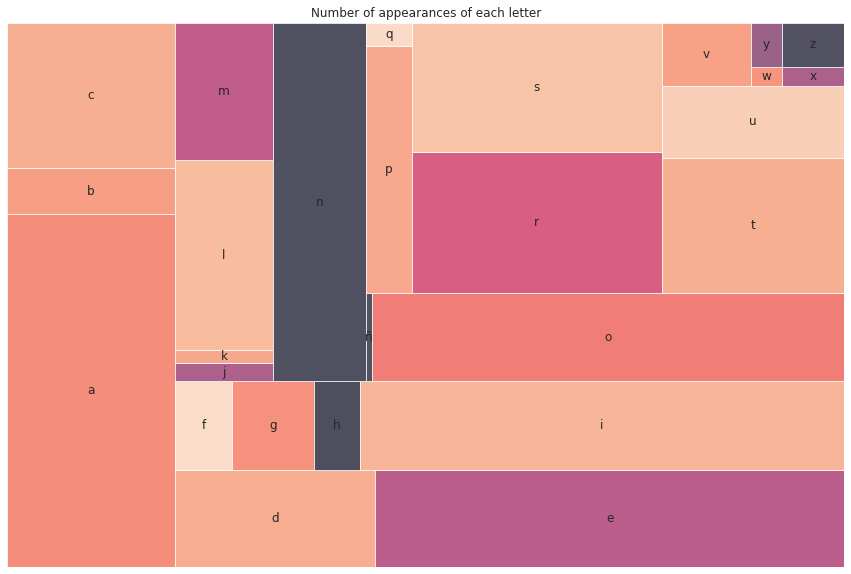

In [135]:
number_of_appearances_of_each_letter = []

for letter in alphabet:
  number_of_appearances_of_each_letter.append(len(position_distribution(letter,processed_text)))

plt.figure(figsize=(15,10))
squarify.plot(sizes=number_of_appearances_of_each_letter,label=alphabet, alpha=.7)
plt.axis('off')
plt.title("Number of appearances of each letter")
plt.show()

##Measure of central tendency

In [136]:
words_length_dataframe = pd.DataFrame()
words_length = [(word, len(word)) for word in processed_text]
words_length_dataframe[["word","lenght"]] = pd.DataFrame(words_length)
words_length_frequency = pd.DataFrame()
words_length_frequency[["lenght","frequency"]] = words_length_dataframe.groupby("lenght",as_index=False).count()

In [137]:
with open('/final_resume_file.txt', 'w', encoding="utf8" ) as f:
         f.write(' '.join(processed_text))

In [138]:
extracted_words = [len(word) for word in extracted_words]

In [139]:
mean_word_length = round(np.mean(extracted_words),2)
median_word_lenght = round(np.median(extracted_words),2)
mode_word_lenght = statistics.mode(extracted_words)

print("The mean word length is %s characters." % (mean_word_length+1))
print("The median word length is %s characters." % (median_word_lenght+1))
print("The mode of the words is %s characters." % (mode_word_lenght+1))

The mean word length is 8.61 characters.
The median word length is 8.0 characters.
The mode of the words is 8 characters.


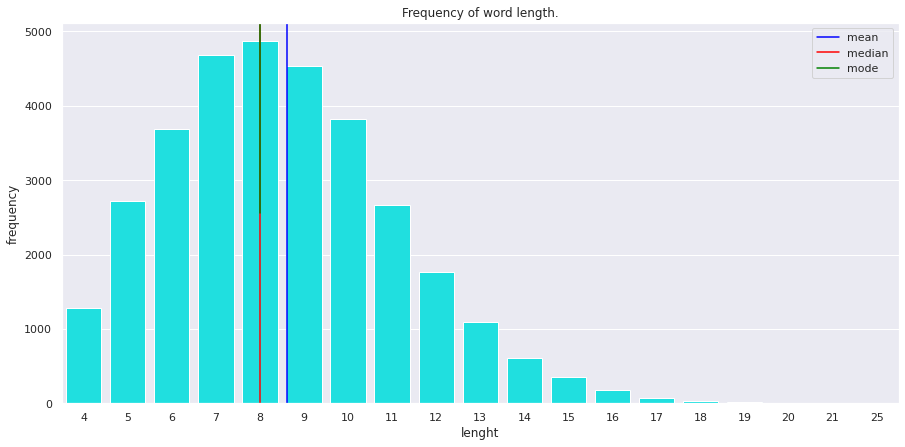

In [140]:
sns.set(rc={'figure.figsize':(15,7)})
plt.title("Frequency of word length.")
sns.barplot(x="lenght",y="frequency",data=words_length_frequency,color="cyan")
plt.axvline(x=mean_word_length-3, color="blue",label="mean")
plt.axvline(x=median_word_lenght-3, color="red",label="median")
plt.axvline(x=mode_word_lenght-3,ymin=0.5 ,color="green",label="mode")
plt.legend()
plt.show()

* El valor que aparece con mayor frecuencia en un conjunto de datos es $8$, lo que nos dice que es la longitud de palabras más probable de encontrar son las de $8$ caracteres.

##Statistical positioning measures

In [141]:
quartile1 = np.quantile(extracted_words, .25)
quartile2 = np.quantile(extracted_words, .50)
quartile3 = np.quantile(extracted_words, .75)
percentile90 = np.quantile(extracted_words, .9)

print("The value of the first quartile is %s" % quartile1)
print("The value of the second quartile is %s" % quartile2)
print("The value of the third quartile is %s" % quartile3)
print("The value of the percentile 90 is %s" % percentile90)

The value of the first quartile is 6.0
The value of the second quartile is 7.0
The value of the third quartile is 9.0
The value of the percentile 90 is 11.0


[]

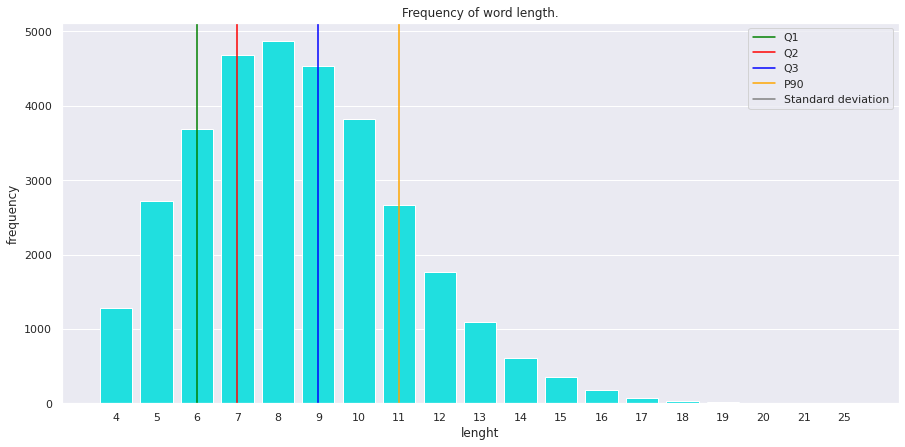

In [142]:
sns.set(rc={'figure.figsize':(15,7)})
plt.title("Frequency of word length.")
sns.barplot(x="lenght",y="frequency",data=words_length_frequency,color="cyan")
plt.axvline(x=quartile1-4, color="green",label="Q1")
plt.axvline(x=quartile2-4, color="red",label="Q2")
plt.axvline(x=quartile3-4, color="blue",label="Q3")
plt.axvline(x=percentile90-4, color="orange",label="P90")
plt.axhline(y=1000,xmin=4,xmax=25, color="gray",label="Standard deviation")
plt.legend()
plt.plot()

* El $90$% de las longitudes de las palabras son menor a $11$ caracteres.
* El $75$% de las longitudes de las palabras son menor a $9$ caracteres.
* El $50$% de las longitudes de las palabras son menor a $7$ caracteres, este valor también corresponde a la mediana de los datos.
* El $25$% de las longitudes de las palabras son menor a $6$ caracteres.

<table class="ws-table-all notranslate">
<tr>
<th style="width:140px">Letter</th>
<th>$Q_1$</th>
<th>$Q_2$</th>
<th>$Q_3$</th>
</tr>
<tr>
<tr>
<th>a</th>
<th>3.0</th>
<th>6.0</th>
<th>8.0</th>
</tr>
<tr>
<th>b</th>
<th>2.0</th>
<th>3.0</th>
<th>6.0</th>
</tr>
<tr>
<th>c</th>
<th>1.0</th>
<th>4.0</th>
<th>7.0</th>
</tr>
<tr>
<th>d</th>
<th>3.0</th>
<th>6.0</th>
<th>8.0</th>
</tr>
<tr>
<th>e</th>
<th>2.0</th>
<th>4.0</th>
<th>7.0</th>
</tr>
<tr>
<th>f</th>
<th>1.0</th>
<th>3.0</th>
<th>5.0</th>
</tr>
<tr>
<th>g</th>
<th>3.0</th>
<th>4.0</th>
<th>6.0</th>
</tr>
<tr>
<th>h</th>
<th>1.0</th>
<th>3.0</th>
<th>5.0</th>
</tr>
<tr>
<th>i</th>
<th>4.0</th>
<th>5.0</th>
<th>7.0</th>
</tr>
<tr>
<th>j</th>
<th>1.0</th>
<th>3.0</th>
<th>5.0</th>
</tr>
<tr>
<th>k</th>
<th>1.0</th>
<th>4.0</th>
<th>5.0</th>
</tr>
<tr>
<th>l</th>
<th>3.0</th>
<th>4.0</th>
<th>6.0</th>
</tr>
<tr>
<th>m</th>
<th>2.0</th>
<th>3.0</th>
<th>6.0</th>
</tr>
<tr>
<th>n</th>
<th>3.0</th>
<th>6.0</th>
<th>8.0</th>
</tr>
<tr>
<th>ñ</th>
<th>3.0</th>
<th>5.0</th>
<th>6.0</th>
</tr>
<tr>
<th>o</th>
<th>3.0</th>
<th>6.0</th>
<th>8.0</th>
</tr>
<tr>
<th>p</th>
<th>1.0</th>
<th>3.0</th>
<th>4.0</th>
</tr>
<tr>
<th>q</th>
<th>2.0</th>
<th>3.0</th>
<th>5.0</th>
</tr>
<tr>
<th>r</th>
<th>3.0</th>
<th>5.0</th>
<th>6.0</th>
</tr>
<tr>
<th>s</th>
<th>3.0</th>
<th>6.0</th>
<th>9.0</th>
</tr>
<tr>
<th>t</th>
<th>3.0</th>
<th>5.0</th>
<th>7.0</th>
</tr>
<tr>
<th>u</th>
<th>2.0</th>
<th>4.0</th>
<th>5.0</th>
</tr>
<tr>
<th>v</th>
<th>2.0</th>
<th>4.0</th>
<th>6.0</th>
</tr>
<tr>
<th>w</th>
<th>1.0</th>
<th>3.0</th>
<th>5.0</th>
</tr>
<tr>
<th>x</th>
<th>2.0</th>
<th>2.0</th>
<th>3.0</th>
</tr>
<tr>
<th>y</th>
<th>3.0</th>
<th>5.0</th>
<th>6.0</th>
</tr>
<tr>
<th>z</th>
<th>4.0</th>
<th>6.0</th>
<th>8.0</th>
</tr>

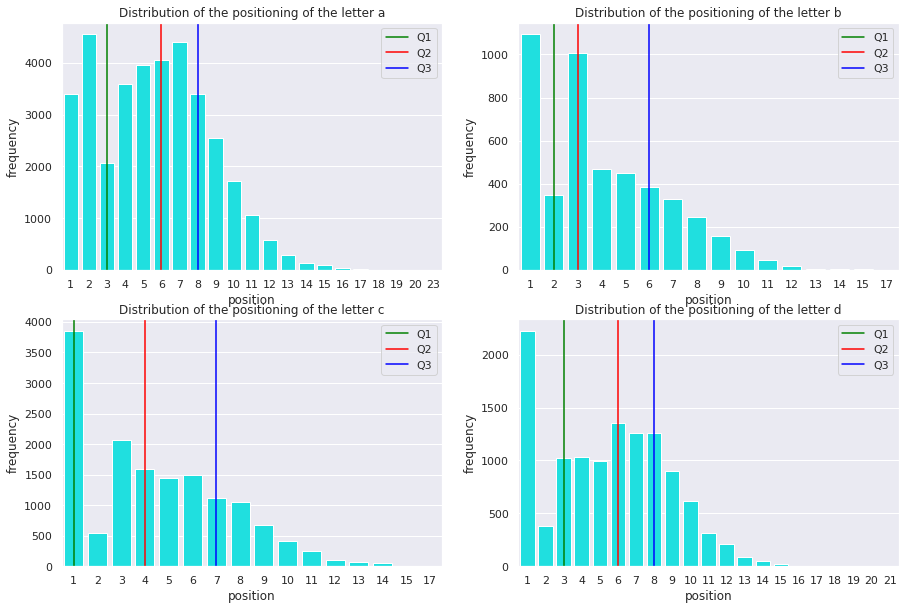

In [143]:
plt.figure(figsize=(15,10))

for i in range(4):

  plt.subplot(2,2,i+1)
  plt.title("Distribution of the positioning of the letter %s" %alphabet[i])
  position_letter_distribution = position_distribution(alphabet[i],processed_text)
  
  position_letter_frequency = pd.DataFrame()
  position_letter_frequency[['position','frequency']] = pd.DataFrame([i for i in list(collections.Counter(position_distribution(alphabet[i],processed_text)).items())],
                                                                     columns=[['position','frequency']])
  
  sns.barplot(x="position",y="frequency",data=position_letter_frequency,color="cyan")

  quartile1 = np.quantile(position_letter_distribution, .25)
  quartile2 = np.quantile(position_letter_distribution, .50)
  quartile3 = np.quantile(position_letter_distribution, .75)

  plt.axvline(x=quartile1-1, color="green",label="Q1")
  plt.axvline(x=quartile2-1, color="red",label="Q2")
  plt.axvline(x=quartile3-1, color="blue",label="Q3")
  plt.legend()

* Letra **A**  
El $25$% de la letra estan ubicadas en la posición $3$ o menos.  
La mediana de la distribución de la letra es $6$.   
El $75$% de las letra **a** tienen una ubicación menor a $8$.
* Letra **B**  
El $25$% de la letra estan ubicadas en la posición $2$ o menos.  
La mediana de la distribución de la letra es $3$.   
El $75$% de las letra **b** tienen una ubicación menor a $6$.
* Letra **C**  
El $25$% de la letra estan ubicadas en la posición $1$ o menos.  
La mediana de la distribución de la letra es $4$.   
El $75$% de las letra **c** tienen una ubicación menor a $7$.
* Letra **D**  
El $25$% de la letra estan ubicadas en la posición $3$ o menos.  
La mediana de la distribución de la letra es $6$.   
El $75$% de las letra **d** tienen una ubicación menor a $8$.

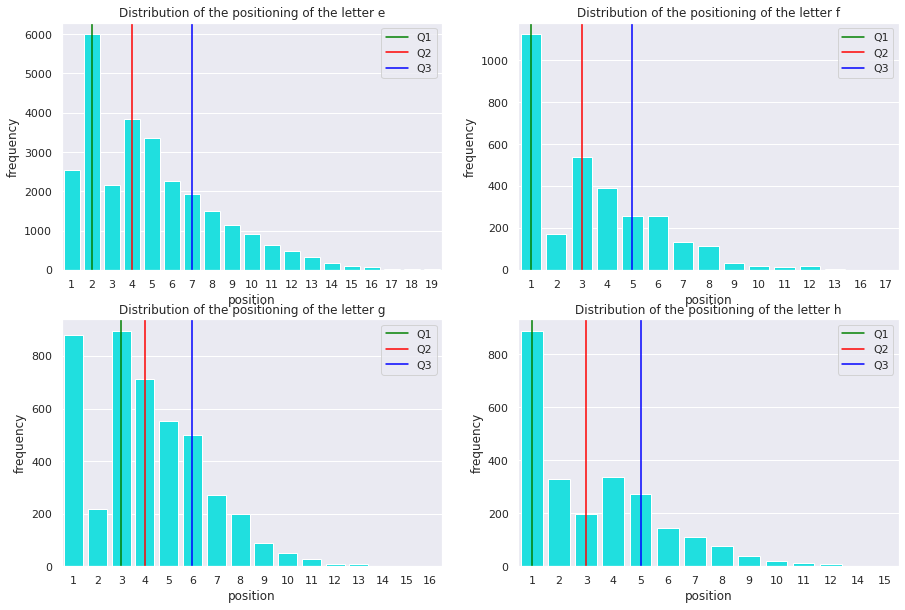

In [144]:
plt.figure(figsize=(15,10))

for i in range(4,8):
  plt.subplot(2,2,(i%4)+1)
  plt.title("Distribution of the positioning of the letter %s" %alphabet[i])
  position_letter_distribution = position_distribution(alphabet[i],processed_text)

  position_letter_frequency = pd.DataFrame()
  position_letter_frequency[['position','frequency']] = pd.DataFrame([i for i in list(collections.Counter(position_distribution(alphabet[i],processed_text)).items())],
                                                                     columns=[['position','frequency']])
  
  sns.barplot(x="position",y="frequency",data=position_letter_frequency,color="cyan")
  
  quartile1 = np.quantile(position_letter_distribution, .25)
  quartile2 = np.quantile(position_letter_distribution, .50)
  quartile3 = np.quantile(position_letter_distribution, .75)

  plt.axvline(x=quartile1-1, color="green",label="Q1")
  plt.axvline(x=quartile2-1, color="red",label="Q2")
  plt.axvline(x=quartile3-1, color="blue",label="Q3")
  plt.legend()

* Letra **E**  
El $25$% de la letra estan ubicadas en la posición $2$ o menos.  
La mediana de la distribución de la letra es $4$.   
El $75$% de las letra **e** tienen una ubicación menor a $7$.
* Letra **F**  
El $25$% de la letra estan ubicadas en la posición $1$ o menos.  
La mediana de la distribución de la letra es $3$.   
El $75$% de las letra **f** tienen una ubicación menor a $5$.
* Letra **G**  
El $25$% de la letra estan ubicadas en la posición $3$ o menos.  
La mediana de la distribución de la letra es $4$.   
El $75$% de las letra **g** tienen una ubicación menor a $6$.
* Letra **H**  
El $25$% de la letra estan ubicadas en la posición $1$ o menos.  
La mediana de la distribución de la letra es $3$.   
El $75$% de las letra **h** tienen una ubicación menor a $5$.

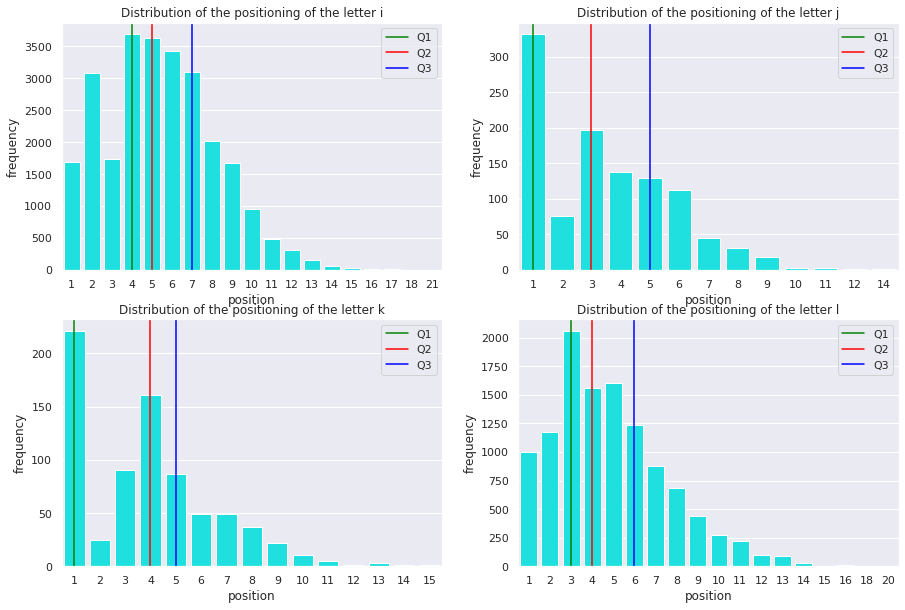

In [145]:
plt.figure(figsize=(15,10))

for i in range(8,12):
  plt.subplot(2,2,(i%8)+1)
  plt.title("Distribution of the positioning of the letter %s" %alphabet[i])
  position_letter_distribution = position_distribution(alphabet[i],processed_text)
  
  position_letter_frequency = pd.DataFrame()
  position_letter_frequency[['position','frequency']] = pd.DataFrame([i for i in list(collections.Counter(position_distribution(alphabet[i],processed_text)).items())],
                                                                     columns=[['position','frequency']])
  
  sns.barplot(x="position",y="frequency",data=position_letter_frequency, color="cyan")
  
  quartile1 = np.quantile(position_letter_distribution, .25)
  quartile2 = np.quantile(position_letter_distribution, .50)
  quartile3 = np.quantile(position_letter_distribution, .75)

  plt.axvline(x=quartile1-1, color="green",label="Q1")
  plt.axvline(x=quartile2-1, color="red",label="Q2")
  plt.axvline(x=quartile3-1, color="blue",label="Q3")
  plt.legend()

* Letra **I**  
El $25$% de la letra estan ubicadas en la posición $4$ o menos.  
La mediana de la distribución de la letra es $5$.   
El $75$% de las letra **i** tienen una ubicación menor a $7$.
* Letra **J**  
El $25$% de la letra estan ubicadas en la posición $1$ o menos.  
La mediana de la distribución de la letra es $3$.   
El $75$% de las letra **j** tienen una ubicación menor a $5$.
* Letra **K**  
El $25$% de la letra estan ubicadas en la posición $1$ o menos.  
La mediana de la distribución de la letra es $4$.   
El $75$% de las letra **k** tienen una ubicación menor a $5$.
* Letra **L**  
El $25$% de la letra estan ubicadas en la posición $3$ o menos.  
La mediana de la distribución de la letra es $4$.   
El $75$% de las letra **l** tienen una ubicación menor a $6$.

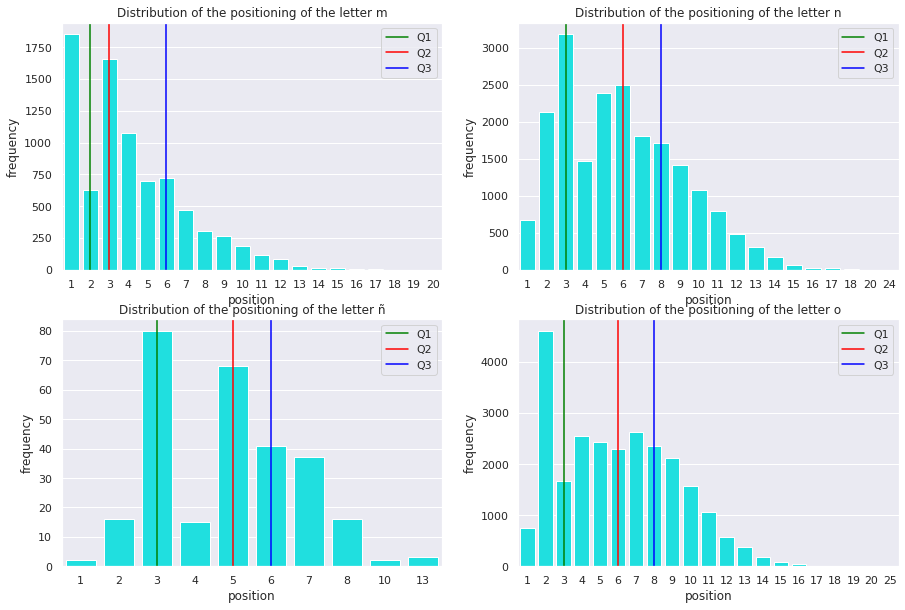

In [146]:
plt.figure(figsize=(15,10))

for i in range(12,16):
  plt.subplot(2,2,(i%12)+1)
  plt.title("Distribution of the positioning of the letter %s" %alphabet[i])
  position_letter_distribution = position_distribution(alphabet[i],processed_text)
    
  position_letter_frequency = pd.DataFrame()
  position_letter_frequency[['position','frequency']] = pd.DataFrame([i for i in list(collections.Counter(position_distribution(alphabet[i],processed_text)).items())],
                                                                     columns=[['position','frequency']])
  
  sns.barplot(x="position",y="frequency",data=position_letter_frequency,color="cyan")
  
  quartile1 = np.quantile(position_letter_distribution, .25)
  quartile2 = np.quantile(position_letter_distribution, .50)
  quartile3 = np.quantile(position_letter_distribution, .75)

  plt.axvline(x=quartile1-1, color="green",label="Q1")
  plt.axvline(x=quartile2-1, color="red",label="Q2")
  plt.axvline(x=quartile3-1, color="blue",label="Q3")
  plt.legend()

* Letra **M**  
El $25$% de la letra estan ubicadas en la posición $2$ o menos.  
La mediana de la distribución de la letra es $3$.   
El $75$% de las letra **m** tienen una ubicación menor a $6$.
* Letra **N**  
El $25$% de la letra estan ubicadas en la posición $3$ o menos.  
La mediana de la distribución de la letra es $6$.   
El $75$% de las letra **n** tienen una ubicación menor a $8$.
* Letra **Ñ**  
El $25$% de la letra estan ubicadas en la posición $3$ o menos.  
La mediana de la distribución de la letra es $5$.   
El $75$% de las letra **ñ** tienen una ubicación menor a $6$.
* Letra **O**  
El $25$% de la letra estan ubicadas en la posición $3$ o menos.  
La mediana de la distribución de la letra es $6$.   
El $75$% de las letra **o** tienen una ubicación menor a $8$.

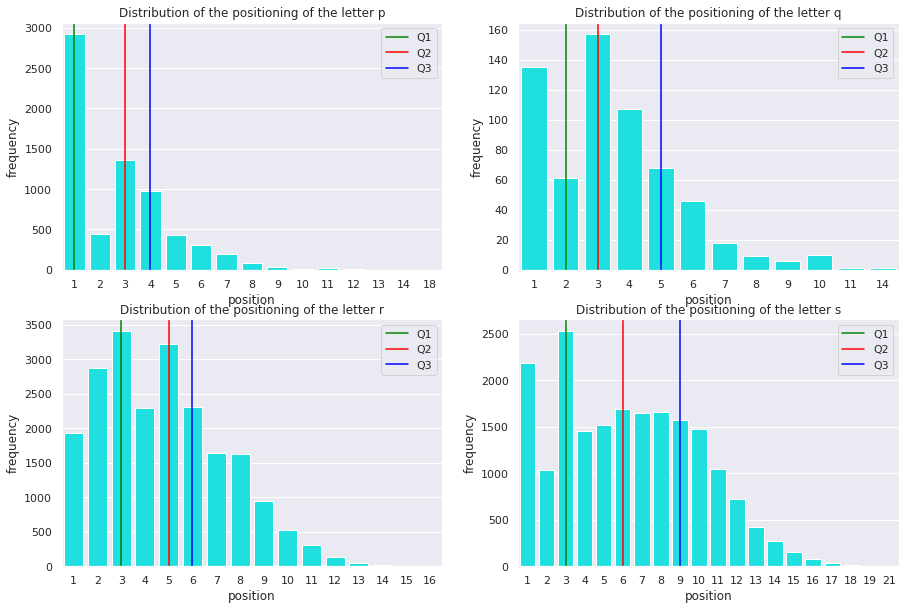

In [147]:
plt.figure(figsize=(15,10))

for i in range(16,20):
  plt.subplot(2,2,(i%16)+1)
  plt.title("Distribution of the positioning of the letter %s" %alphabet[i])
  position_letter_distribution = position_distribution(alphabet[i],processed_text)
  
  position_letter_frequency = pd.DataFrame()
  position_letter_frequency[['position','frequency']] = pd.DataFrame([i for i in list(collections.Counter(position_distribution(alphabet[i],processed_text)).items())],
                                                                     columns=[['position','frequency']])
  
  sns.barplot(x="position",y="frequency",data=position_letter_frequency,color="cyan")
  
  quartile1 = np.quantile(position_letter_distribution, .25)
  quartile2 = np.quantile(position_letter_distribution, .50)
  quartile3 = np.quantile(position_letter_distribution, .75)

  plt.axvline(x=quartile1-1, color="green",label="Q1")
  plt.axvline(x=quartile2-1, color="red",label="Q2")
  plt.axvline(x=quartile3-1, color="blue",label="Q3")
  plt.legend()

* Letra **P**  
El $25$% de la letra estan ubicadas en la posición $1$ o menos.  
La mediana de la distribución de la letra es $3$.   
El $75$% de las letra **p** tienen una ubicación menor a $4$.
* Letra **Q**  
El $25$% de la letra estan ubicadas en la posición $2$ o menos.  
La mediana de la distribución de la letra es $3$.   
El $75$% de las letra **q** tienen una ubicación menor a $5$.
* Letra **R**  
El $25$% de la letra estan ubicadas en la posición $3$ o menos.  
La mediana de la distribución de la letra es $5$.   
El $75$% de las letra **r** tienen una ubicación menor a $6$.
* Letra **S**  
El $25$% de la letra estan ubicadas en la posición $3$ o menos.  
La mediana de la distribución de la letra es $6$.   
El $75$% de las letra **s** tienen una ubicación menor a $9$.

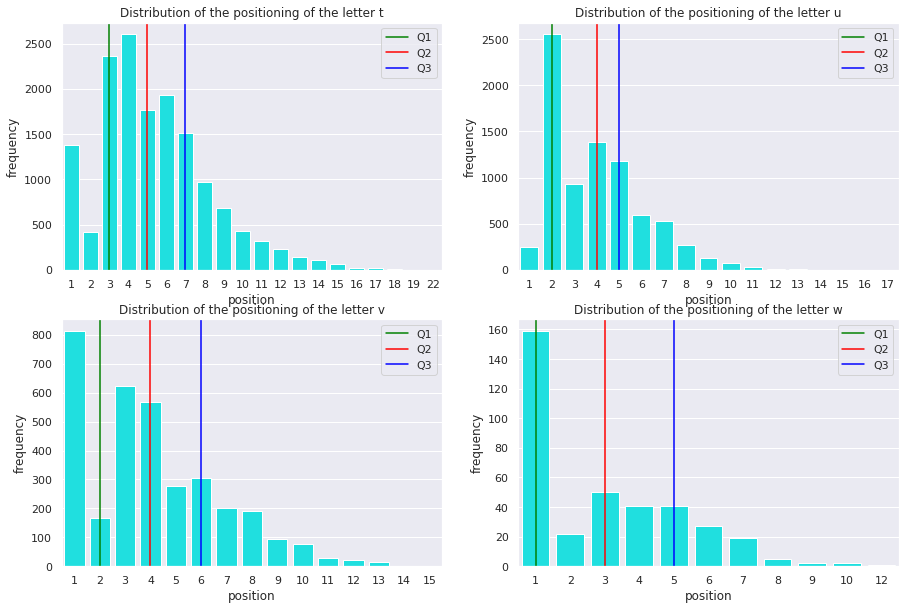

In [148]:
plt.figure(figsize=(15,10))

for i in range(20,24):
  plt.subplot(2,2,(i%20)+1)
  plt.title("Distribution of the positioning of the letter %s" %alphabet[i])
  position_letter_distribution = position_distribution(alphabet[i],processed_text)
  
  position_letter_frequency = pd.DataFrame()
  position_letter_frequency[['position','frequency']] = pd.DataFrame([i for i in list(collections.Counter(position_distribution(alphabet[i],processed_text)).items())],
                                                                     columns=[['position','frequency']])
  
  sns.barplot(x="position",y="frequency",data=position_letter_frequency,color="cyan")
  
  quartile1 = np.quantile(position_letter_distribution, .25)
  quartile2 = np.quantile(position_letter_distribution, .50)
  quartile3 = np.quantile(position_letter_distribution, .75)

  plt.axvline(x=quartile1-1, color="green",label="Q1")
  plt.axvline(x=quartile2-1, color="red",label="Q2")
  plt.axvline(x=quartile3-1, color="blue",label="Q3")
  plt.legend()

* Letra **T**  
El $25$% de la letra estan ubicadas en la posición $3$ o menos.  
La mediana de la distribución de la letra es $5$.   
El $75$% de las letra **t** tienen una ubicación menor a $7$.
* Letra **U**  
El $25$% de la letra estan ubicadas en la posición $2$ o menos.  
La mediana de la distribución de la letra es $4$.   
El $75$% de las letra **u** tienen una ubicación menor a $5$.
* Letra **V**  
El $25$% de la letra estan ubicadas en la posición $2$ o menos.  
La mediana de la distribución de la letra es $4$.   
El $75$% de las letra **v** tienen una ubicación menor a $6$.
* Letra **W**  
El $25$% de la letra estan ubicadas en la posición $1$ o menos.  
La mediana de la distribución de la letra es $3$.   
El $75$% de las letra **w** tienen una ubicación menor a $5$.

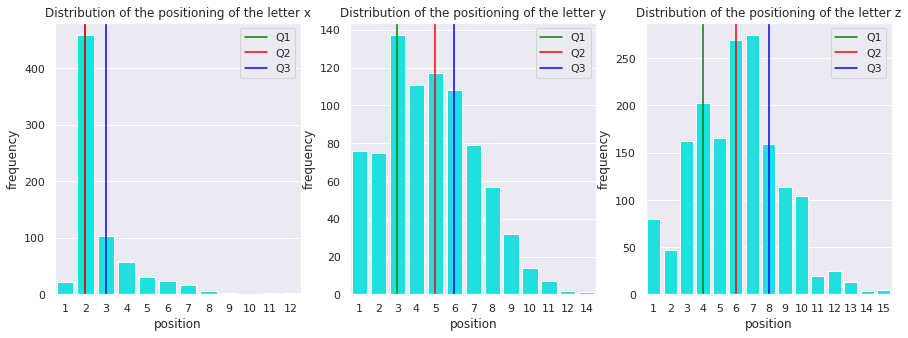

In [149]:
plt.figure(figsize=(15,5))

for i in range(24,27):
  plt.subplot(1,3,(i%24)+1)
  plt.title("Distribution of the positioning of the letter %s" %alphabet[i])
  position_letter_distribution = position_distribution(alphabet[i],processed_text)
  
  position_letter_frequency = pd.DataFrame()
  position_letter_frequency[['position','frequency']] = pd.DataFrame([i for i in list(collections.Counter(position_distribution(alphabet[i],processed_text)).items())],
                                                                     columns=[['position','frequency']])
  
  sns.barplot(x="position",y="frequency",data=position_letter_frequency,color="cyan")
  
  quartile1 = np.quantile(position_letter_distribution, .25)
  quartile2 = np.quantile(position_letter_distribution, .50)
  quartile3 = np.quantile(position_letter_distribution, .75)

  plt.axvline(x=quartile1-1, color="green",label="Q1")
  plt.axvline(x=quartile2-1, color="red",label="Q2")
  plt.axvline(x=quartile3-1, color="blue",label="Q3")
  plt.legend()

* Letra **X**  
El $Q_1$ y $Q_2$ tiene como valor $2$, es decir que el $50$% de los datos son menor o igual a $2$.  
El $25$% de las estan en las posición $3$ o más.
* Letra **Y**  
El $25$% de la letra estan ubicadas en la posición $3$ o menos.  
La mediana de la distribución de la letra es $5$.   
El $75$% de las letra **y** tienen una ubicación menor a 6.
* Letra **Z**  
El $25$% de la letra estan ubicadas en la posición $4$ o menos.  
La mediana de la distribución de la letra es $6$.   
El $75$% de las letra **z** tienen una ubicación menor a 8.

##Measures of statistical dispersion

In [150]:
words_length_range = max(extracted_words)-min(extracted_words)
words_length_variance = statistics.variance(extracted_words)
words_length_standart_desviation = statistics.stdev(extracted_words)

print("The range for the length of the words presented in the word bank is %s" % words_length_range)
print("he variance for the length of the words presented in the word bank is %s" % round(words_length_variance,2))
print("The standard deviation for the length of the words presented in the word bank is %s words" % round(words_length_standart_desviation,2))

The range for the length of the words presented in the word bank is 21
he variance for the length of the words presented in the word bank is 5.99
The standard deviation for the length of the words presented in the word bank is 2.45 words


In [151]:
for letter in alphabet:

  position_letter_distribution = position_distribution(letter,processed_text)

  letter_position_distribution_range = max(position_letter_distribution)-min(position_letter_distribution)
  letter_position_distribution_variance = statistics.variance(position_letter_distribution)
  letter_position_distribution_standart_desviation = statistics.stdev(position_letter_distribution)

  print("The range of position distribution of the letter %s is %s" % (letter, letter_position_distribution_range))
  print("The variance of position distribution of the letter %s is %s" % (letter, round(letter_position_distribution_variance,2)))
  print("The standard deviation of position distribution of the letter %s is %s" % (letter, round(letter_position_distribution_standart_desviation,2)))
  
  print("----------------------------------------------------------------------------------------------------------------------------------------")  

The range of position distribution of the letter a is 22
The variance of position distribution of the letter a is 9.53
The standard deviation of position distribution of the letter a is 3.09
----------------------------------------------------------------------------------------------------------------------------------------
The range of position distribution of the letter b is 16
The variance of position distribution of the letter b is 7.04
The standard deviation of position distribution of the letter b is 2.65
----------------------------------------------------------------------------------------------------------------------------------------
The range of position distribution of the letter c is 16
The variance of position distribution of the letter c is 9.01
The standard deviation of position distribution of the letter c is 3.0
----------------------------------------------------------------------------------------------------------------------------------------
The range of posi


<table class="ws-table-all notranslate">
<tr>
<th style="width:140px">Letter</th>
<th>Range</th>
<th>Variance</th>
<th>Standard deviation</th>
</tr>
<tr>
<th>a</th>
<th>22</th>
<th>9.53</th>
<th>3.09</th>
</tr>
<tr>
<th>b</th>
<th>16</th>
<th>7.03</th>
<th>2.65</th>
</tr>
<tr>
<th>c</th>
<th>16</th>
<th>9.01</th>
<th>3.0</th>
</tr>
<tr>
<th>d</th>
<th>20</th>
<th>10.57</th>
<th>3.25</th>
</tr>
<tr>
<th>e</th>
<th>18</th>
<th>10.07</th>
<th>3.17</th>
</tr>
<tr>
<th>f</th>
<th>16</th>
<th>5.87</th>
<th>2.42</th>
</tr>
<tr>
<th>g</th>
<th>15</th>
<th>5.65</th>
<th>2.38</th>
</tr>
<tr>
<th>h</th>
<th>14</th>
<th>5.95</th>
<th>2.44</th>
</tr>
<tr>
<th>i</th>
<th>20</th>
<th>7.6</th>
<th>2.76</th>
</tr>
<tr>
<th>j</th>
<th>13</th>
<th>5.03</th>
<th>2.24</th>
</tr>
<tr>
<th>k</th>
<th>14</th>
<th>6.84</th>
<th>2.61</th>
</tr>
<tr>
<th>l</th>
<th>19</th>
<th>7.42</th>
<th>2.72</th>
</tr>
<tr>
<th>m</th>
<th>19</th>
<th>8.17</th>
<th>2.86</th>
</tr>
<tr>
<th>n</th>
<th>23</th>
<th>9.91</th>
<th>3.15</th>
</tr>
<tr>
<th>ñ</th>
<th>12</th>
<th>3.88</th>
<th>1.97</th>
</tr>
<tr>
<th>o</th>
<th>24</th>
<th>10.63</th>
<th>3.26</th>
</tr>
<tr>
<th>p</th>
<th>17</th>
<th>4.05</th>
<th>2.01</th>
</tr>
<tr>
<th>q</th>
<th>13</th>
<th>4.3</th>
<th>2.07</th>
</tr>
<tr>
<th>r</th>
<th>15</th>
<th>6.94</th>
<th>2.63</th>
</tr>
<tr>
<th>s</th>
<th>20</th>
<th>13.5</th>
<th>3.67</th>
</tr>
<tr>
<th>t</th>
<th>21</th>
<th>8.55</th>
<th>2.92</th>
</tr>
<tr>
<th>u</th>
<th>16</th>
<th>4.54</th>
<th>2.13</th>
</tr>
<tr>
<th>v</th>
<th>14</th>
<th>7.21</th>
<th>2.69</th>
</tr>
<tr>
<th>w</th>
<th>11</th>
<th>4.86</th>
<th>2.2</th>
</tr>
<tr>
<th>x</th>
<th>11</th>
<th>2.42</th>
<th>1.55</th>
</tr>
<tr>
<th>y</th>
<th>13</th>
<th>5.79</th>
<th>2.41</th>
</tr>
<tr>
<th>z</th>
<th>14</th>
<th>6.94</th>
<th>2.63</th>
</tr>

##Data distributions

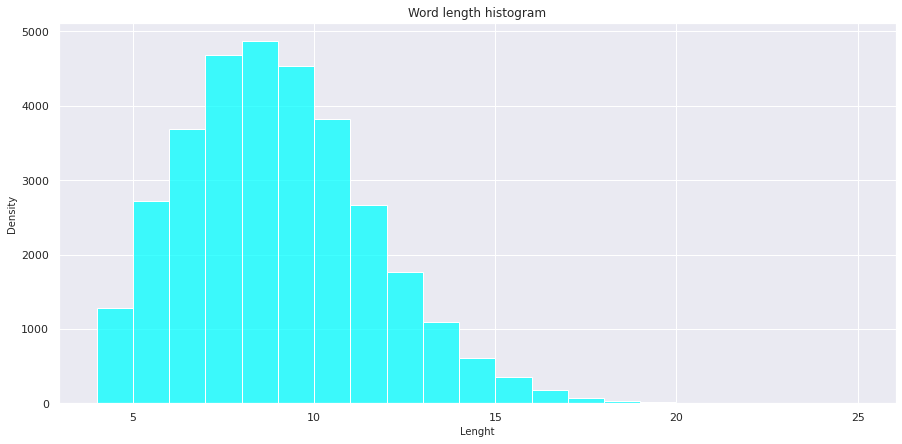

In [152]:
sns.histplot(data=[len(lenght) for lenght in processed_text],color="cyan",binwidth=1)
plt.title("Word length histogram",fontsize=12)
plt.xlabel("Lenght",fontsize=10)
plt.ylabel("Density",fontsize=10)
plt.show()

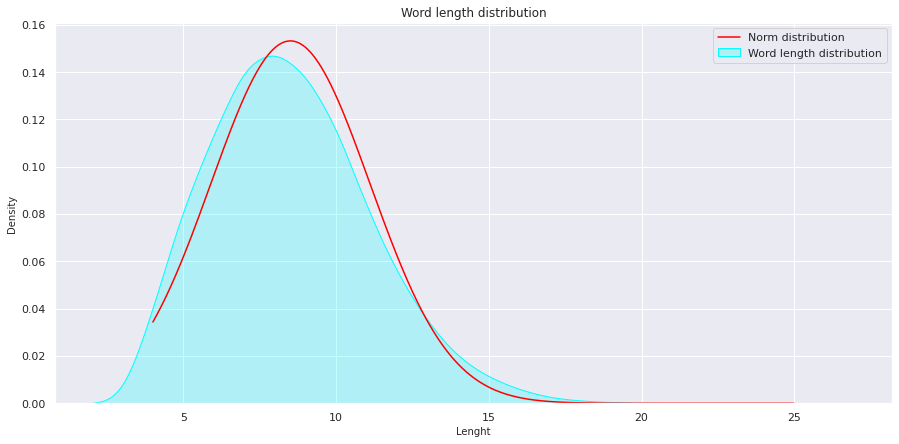

In [153]:
sns.kdeplot(data=[len(lenght) for lenght in processed_text], bw_adjust=2, shade=True, color="cyan")
plt.title("Word length distribution",fontsize=12)
plt.xlabel("Lenght",fontsize=10)
plt.ylabel("Density",fontsize=10)
distribucion = stats.norm

datos = [len(lenght) for lenght in processed_text]

# 2) Con el método fit() se obtienen los parámetros
parametros = distribucion.fit(data=datos)

x_axis = np.arange(4, 25, 0.01) 
  
plt.plot(x_axis, stats.norm.pdf(x_axis, parametros[0], parametros[1]),color="red")
plt.legend(["Norm distribution", "Word length distribution"]) 
plt.show()

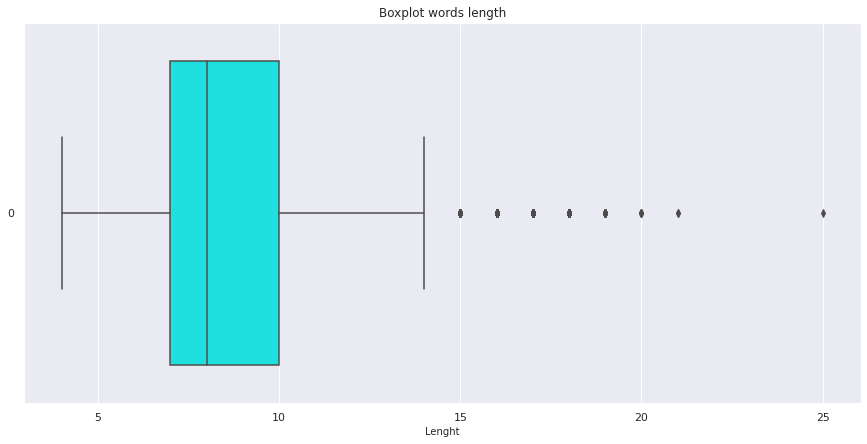

In [154]:
sns.boxplot(data=[len(lenght) for lenght in processed_text],orient="h",color="cyan")
plt.title("Boxplot words length",fontsize=12)
plt.xlabel("Lenght",fontsize=10)
plt.show()

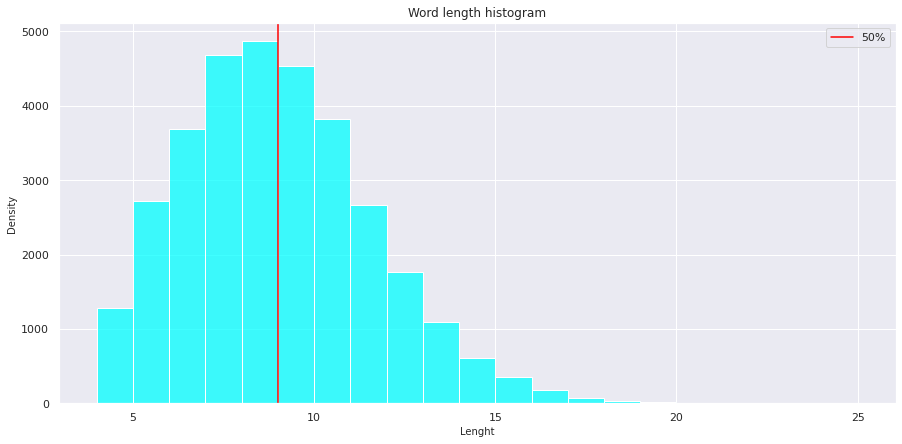

In [155]:
Q2 = np.quantile([len(lenght) for lenght in processed_text],.5)


sns.histplot(data=[len(lenght) for lenght in processed_text],color="cyan",binwidth=1)
plt.title("Word length histogram",fontsize=12)
plt.xlabel("Lenght",fontsize=10)
plt.ylabel("Density",fontsize=10)
plt.axvline(x=Q2+1, color="red",label="50%")
plt.legend()
plt.show()

In [156]:
position_letter_distribution = {}
for i in alphabet:
  position_letter_distribution[i] = position_distribution(i,processed_text)

import json

with open("/content/letterDistribution.json" , "w") as file:
  json.dump(position_letter_distribution, file)

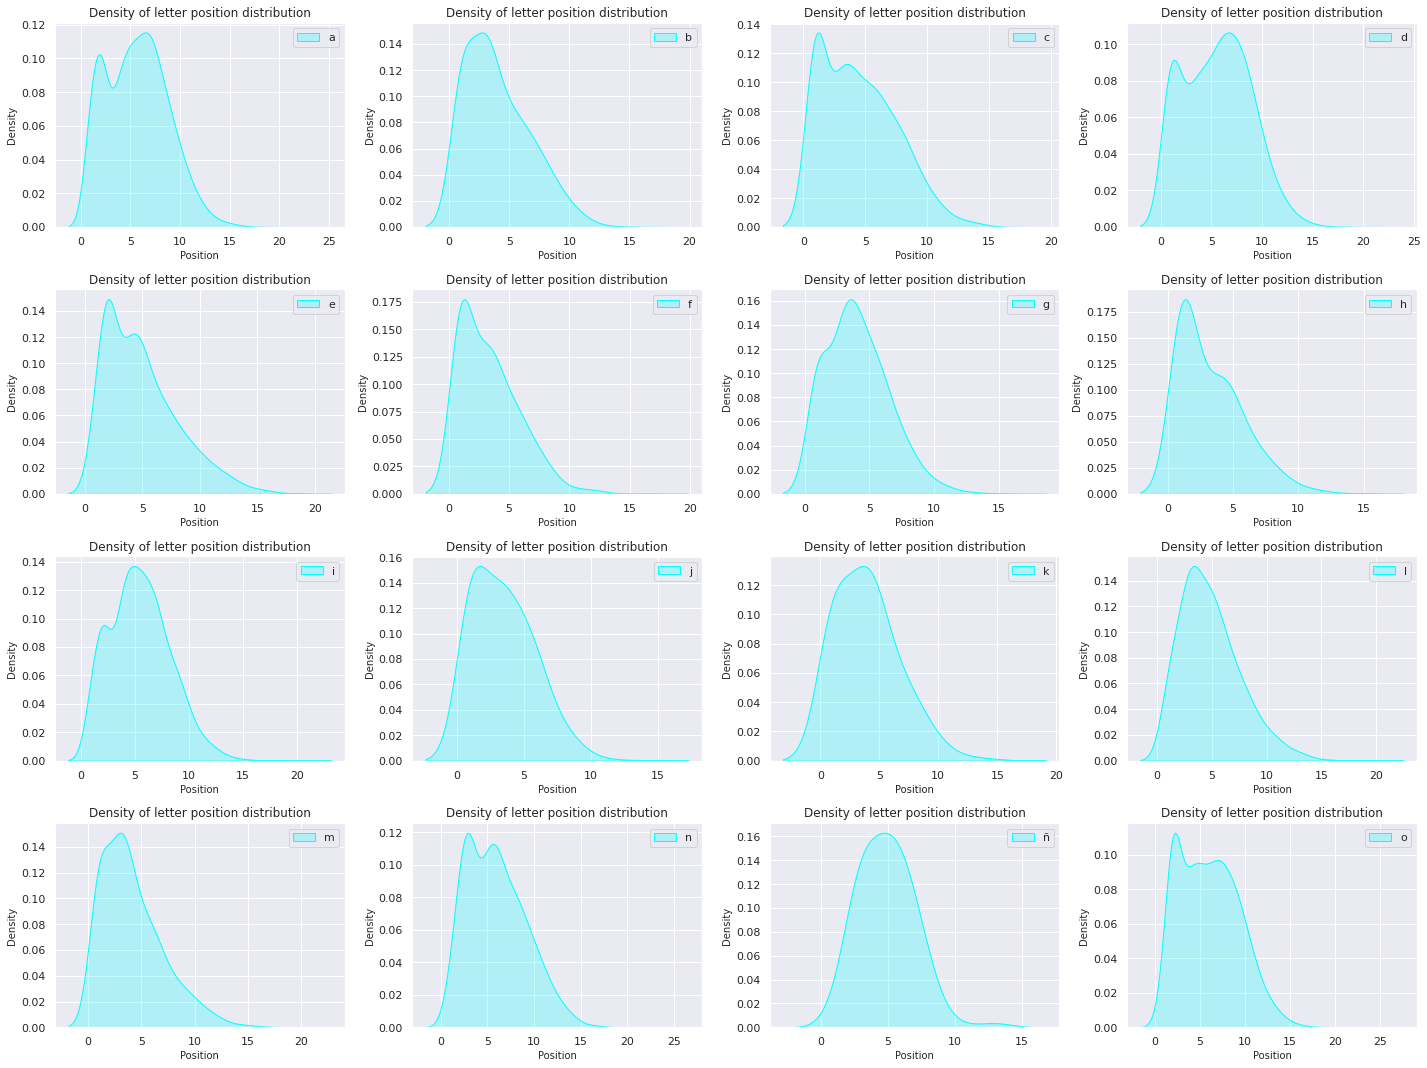

In [157]:
plt.figure(figsize=(20,15))

for i in range(16):
  plt.subplot(4,4,i+1)
  plt.title("Density of letter position distribution")
  position_letter_distribution = position_distribution(alphabet[i],processed_text)
  plt.xlabel("Position",fontsize=10)
  plt.ylabel("Density",fontsize=10)
  sns.kdeplot(position_letter_distribution, shade=True, bw_adjust=2, color="cyan")
  plt.legend(alphabet[i])
plt.tight_layout()

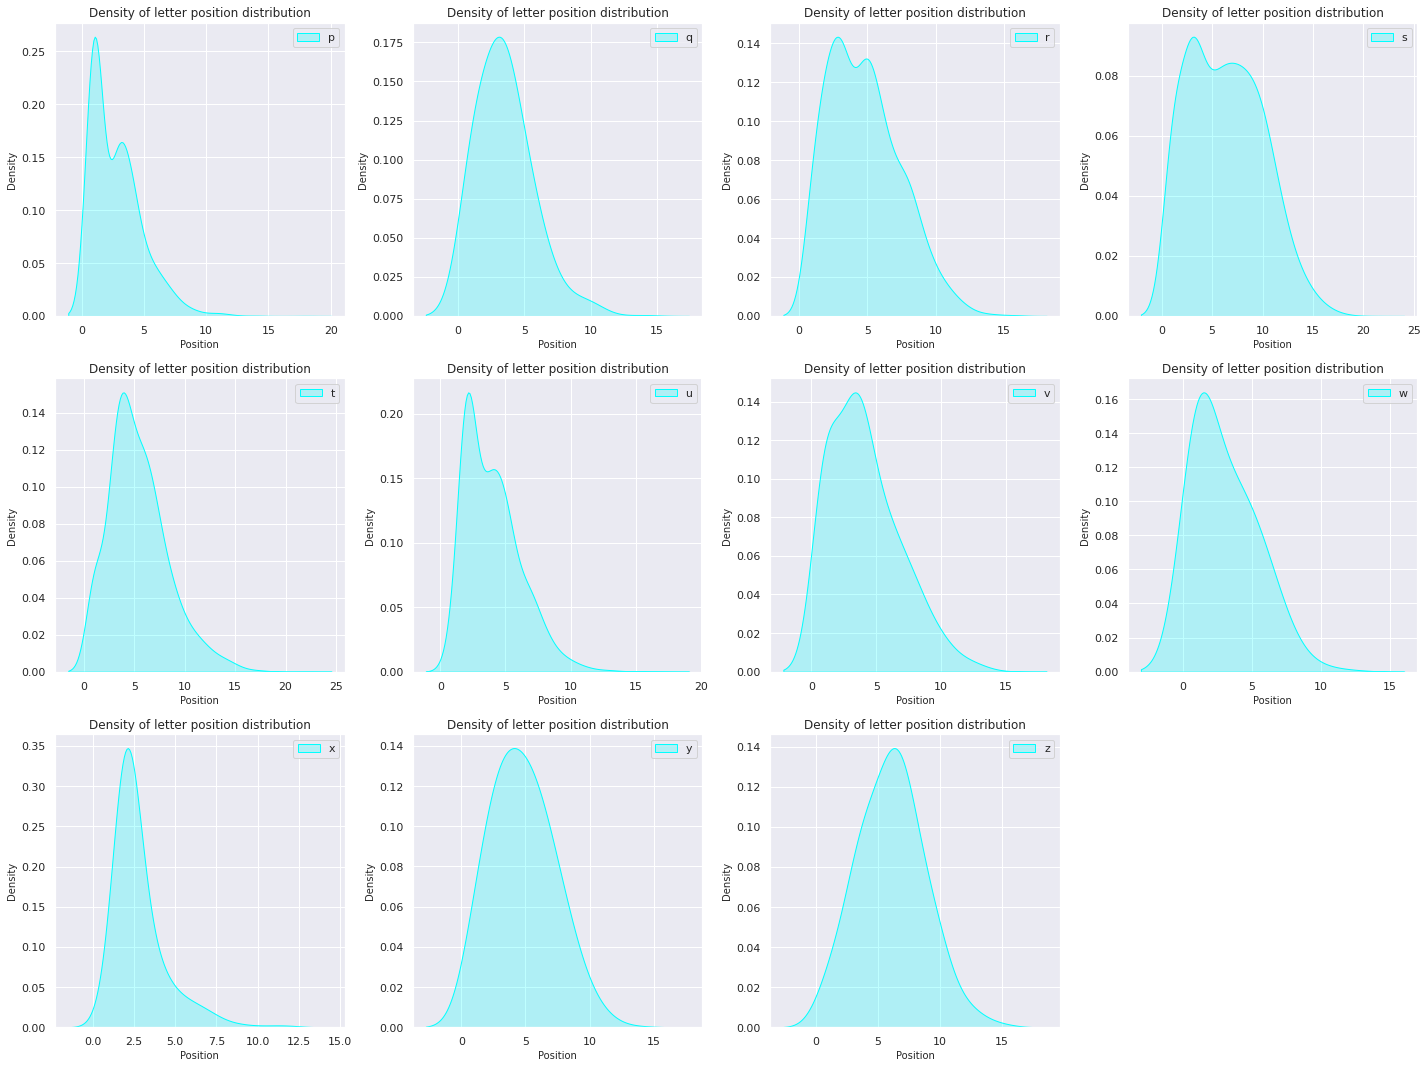

In [158]:
plt.figure(figsize=(20,15))

for i in range(16,len(alphabet)):
  plt.subplot(3,4,(i%16)+1)
  plt.title("Density of letter position distribution")
  position_letter_distribution = position_distribution(alphabet[i],processed_text)
  plt.xlabel("Position",fontsize=10)
  plt.ylabel("Density",fontsize=10)
  sns.kdeplot(position_letter_distribution, shade=True, bw_adjust=2, color="cyan")
  plt.legend(alphabet[i])
plt.tight_layout()
plt.savefig("/content/drive/My Drive/test2.png")

##Introduction to hypothesis testing

In [159]:
vowels = ['a','e','i','o','u']

vowels_position_distribution = []

for vowel in vowels:
  for position in position_distribution(vowel,processed_text):
    vowels_position_distribution.append(position)

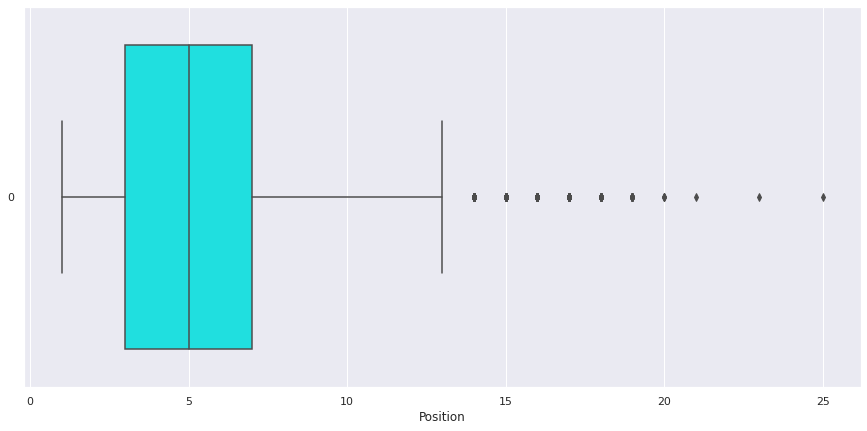

In [160]:
sns.boxplot(data = vowels_position_distribution,orient="h",color="cyan")
plt.xlabel("Position")
plt.show()

In [161]:
consonants = [ 'b', 'c', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'ñ', 'p', 'q', 'r', 's', 't', 'v', 'w', 'x', 'y', 'z']

consonants_position_distribution = []

for consonant in consonants:
  for position in position_distribution(consonant,processed_text):
    consonants_position_distribution.append(position)

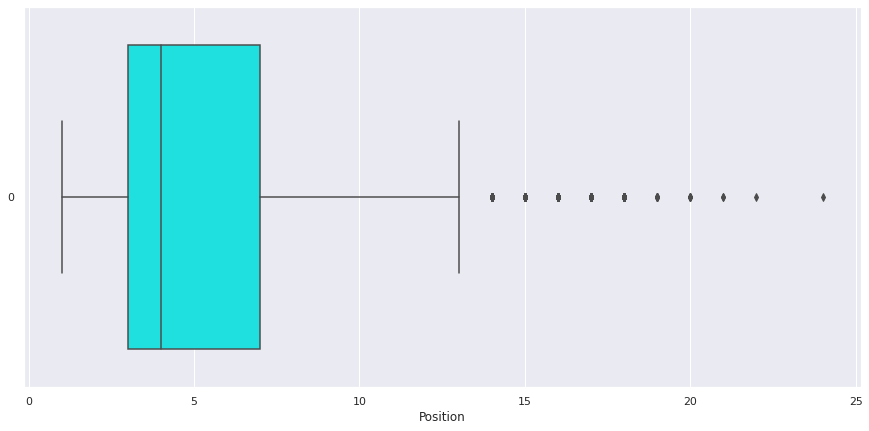

In [162]:
sns.boxplot(data = consonants_position_distribution,orient="h",color="cyan")
plt.xlabel("Position")
plt.show()

In [163]:
outlierVowels = np.quantile(vowels_position_distribution,.75)+ 1.5*(np.quantile(vowels_position_distribution,.75)-np.quantile(vowels_position_distribution,.25))
vowels_position_distribution = [letter for letter in vowels_position_distribution if letter <= outlierVowels]


In [164]:
outlierConsonants = np.quantile(consonants_position_distribution,.75)+ 1.5*(np.quantile(consonants_position_distribution,.75)-np.quantile(consonants_position_distribution,.25))
consonants_position_distribution = [letter for letter in consonants_position_distribution if letter <= outlierConsonants]


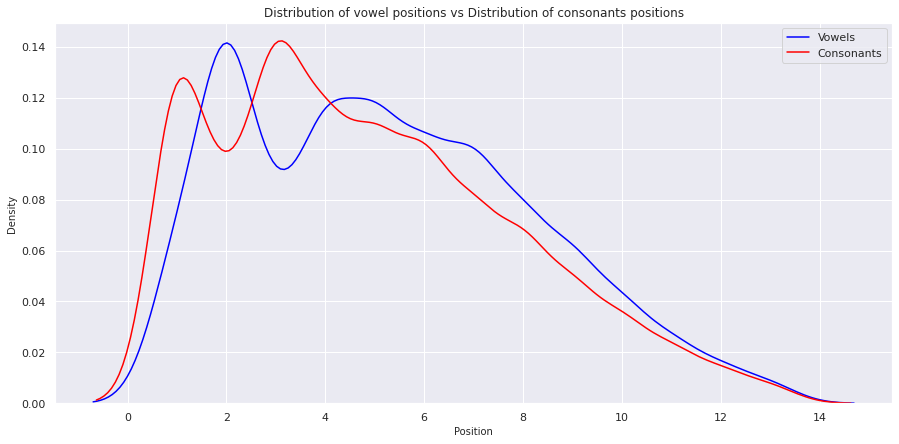

In [165]:
sns.kdeplot(data=np.sort(vowels_position_distribution),bw_adjust=2,color="blue")
sns.kdeplot(data=np.sort(consonants_position_distribution),bw_adjust=2,color="red")
plt.title("Distribution of vowel positions vs Distribution of consonants positions")
plt.xlabel("Position",fontsize=10)
plt.ylabel("Density",fontsize=10)
plt.legend(["Vowels","Consonants"])
plt.show()

$H_0$: The two distributions are identica.  
$H_a$: The two distributions are not identical

In [166]:
vowels_position_distribution = np.sort(vowels_position_distribution)
consonants_position_distribution = np.sort(consonants_position_distribution)

In [167]:
stast, p = ks_2samp(vowels_position_distribution,consonants_position_distribution)

if(p <= 0.05):
  print("The null hypothesis is rejected.")
else:
  print("The null hypothesis cannot be rejected by the alternative hypothesis.")

The null hypothesis is rejected.


##Determination of correlation between variables

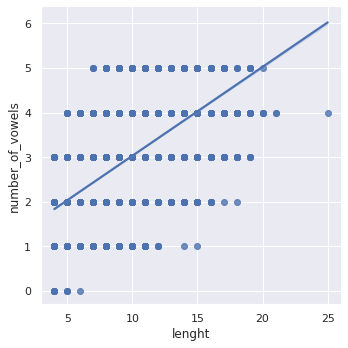

In [168]:
length_and_number_vowels  = [] 

for word in processed_text:
  count = 0
  for vowel in vowels:
    if vowel in word:
      count += 1

  length_and_number_vowels.append([len(word), count])

sns.lmplot(x="lenght", y="number_of_vowels", data= pd.DataFrame(length_and_number_vowels,columns=[['lenght','number_of_vowels']]))
sns.set(rc={'figure.figsize':(15,7)})
plt.show()

In [169]:
pd.DataFrame(length_and_number_vowels,columns=[['lenght','number_of_vowels']]).to_csv("/content/prueba.csv")

In [170]:
covariance = np.cov([length for length, number_vowels in length_and_number_vowels],[number_vowels for length, number_vowels in length_and_number_vowels])[0][1]
covariance = round(covariance,2)

standard_deviation_lenght =  statistics.stdev([length for length, number_vowels in length_and_number_vowels])
standard_deviation_number_vowels = statistics.stdev([length for length, number_vowels in length_and_number_vowels])

correlation_coefficient = covariance/(standard_deviation_lenght*standard_deviation_number_vowels)
correlation_coefficient = round(correlation_coefficient,2)

print("Covariance between word length and the number of vowels contained in a word: %s" % covariance)
print("Correlation coefficient between word length and the number of vowels contained in a word: %s" % correlation_coefficient)

corr, _ = pearsonr([length for length, number_vowels in length_and_number_vowels], [number_vowels for length, number_vowels in length_and_number_vowels]) 
corr = round(corr,2)

print("Pearson correlation between word length and the number of vowels contained in a word: %s" % corr)

Covariance between word length and the number of vowels contained in a word: 1.35
Correlation coefficient between word length and the number of vowels contained in a word: 0.2
Pearson correlation between word length and the number of vowels contained in a word: 0.59


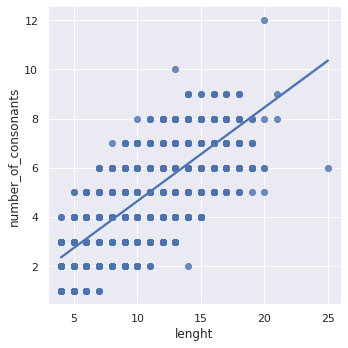

In [171]:
length_and_number_consonants  = [] 

for word in processed_text:
  count = 0
  for consonant in consonants:
    if consonant in word:
      count += 1

  length_and_number_consonants.append([len(word), count])

sns.lmplot(x="lenght", y="number_of_consonants", data= pd.DataFrame(length_and_number_consonants,columns=[['lenght','number_of_consonants']]))
sns.set(rc={'figure.figsize':(15,7)})
plt.show()

In [172]:
pd.DataFrame(length_and_number_consonants,columns=[['lenght','number_of_consonants']]).to_csv("/content/correlacion2.csv")

In [173]:
covariance = np.cov([length for length, number_consonants in length_and_number_consonants],[number_consonants for length, number_consonants in length_and_number_consonants])[0][1]
covariance = round(covariance,2)

standard_deviation_lenght =  statistics.stdev([length for length, number_consonants in length_and_number_consonants])
standard_deviation_number_consonants = statistics.stdev([length for length, number_consonants in length_and_number_consonants])

correlation_coefficient = covariance/(standard_deviation_lenght*standard_deviation_number_consonants)
correlation_coefficient = round(correlation_coefficient,2)

print("Covariance between word length and the number of consonants contained in a word: %s" % covariance)
print("Correlation coefficient between word length and the number of consonants contained in a word: %s" % correlation_coefficient)

corr, _ = pearsonr([length for length, number_consonants in length_and_number_consonants], [number_consonants for length, number_consonants in length_and_number_consonants]) 
corr = round(corr,2)

print("Pearson correlation between word length and the number of vowels contained in a word: %s" % corr)

Covariance between word length and the number of consonants contained in a word: 2.59
Correlation coefficient between word length and the number of consonants contained in a word: 0.38
Pearson correlation between word length and the number of vowels contained in a word: 0.79
